# Applied Data Science Capstone Project

This a jupyter notebook for the final project of the Applied data science specialization from Coursera IBM path career
The project will use a car accident dataset to predict the severity of an accident.

# Introduction/Business Problem 

Nowadays the car is one of the most used medium to travel, to go to work, move between cities,etc. This phenomenon increases the number of cars in the streets and the possibilities of accidents between cars, cyclist or pedestrians.

Also conditions like location, weather, road staus, speed, light and others can influence  the accident odds and this could result in injuries, car and property damage, fatalities, financial impact, medical bills, emotional impact or long-term consequences.

Stakeholder groups that are affected for the car accidents are drivers, pedestrians, cyclist, local and regional authorities and others involved in the accidents.

Taking that in consideration the question or problem to be answered with this project is knowing certain conditions (weather, location, day, road status,etc) what is the probability to have a car accident predicting the severity of it.

This will help the stakeholders in different ways, for example:

- Avoiding to drive when there are some risky conditions
- Drive carefully due to certain conditions
- Reduce fatalities
- Reduce medical bills
- Minimizing fatal/injury car crash
- Identify locations with highest accidents rate and take actions


---
# DATA UNDERSTANDING
---

In order to address the problem, there is a dataset called **Collision -All Years** which has data for the Seattle city car accidents.
The file is in .csv format, and can be found in this link: [DATASET](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv), also a description for each file is [HERE](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)

The dataset contains **194673** observations and **38** features or columns, this is the list of features:

| FIELD       | TYPE       | FIELD     | TYPE       | FIELD     | TYPE      | FIELD     | TYPE      | FIELD     | TYPE      |
| ----------- | ----------- |-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
|SEVERITYCODE | int64       |ADDRTYPE   | object    |PERSONCOUNT| int64     |SDOT_COLDESC|object    |SPEEDING   |object     |
|X            | float64     |INTKEY     | float64   |PEDCOUNT   | int64     |INATTENTIONIND|object  |ST_COLCODE |object     |
|Y            | floa64      |LOCATION   | object    |PEDCYLCOUNT| int64     |UNDERINFL  |object     |ST_COLDESC |object     |
|OBJECTID     | int64       |EXCEPTRSNCODE |object  |VEHCOUNT   | int64     |WEATHER    |object     |SEGLANEKEY |int64      |
|INCKEY       | int64       |EXCEPTRSNDESC |object  |INCDATE    | object    |ROADCOND   |object     |CROSSWALKKEY|int64     |
|COLDETKEY    | int64       |SEVERITYCODE.1|int64   |INCDTTM    | object    |LIGHTCOND  |object     |HITPARKEDCAR|object    |
|REPORTNO     | object      |SEVERITYDESC  |object  |JUNCTIONTYPE|object    |PEDROWNOTGRNT|object   |            |          |
|STATUS       | object      |COLLISIONTYPE |object  |SDOT_COLCODE|int64     |SDOTCOLNUM|float64     |            |          |

The first column **SEVERITYCODE** which describes the fatality of an accident will be used as the target or labeled data, the other columns have different types of attributes, many of the observations are good to train and test the machine learning model.

Analyzing the dataset 

- 6 of the features have many missing values, for the modelling those features that have more than 50% missing data will not be used for 
trainning or testing.

| FIELD       | %NaN VALUES      | FIELD          | %NaN Values  | FIELD        | %NaN Values  | 
| ----------- | ---------------- |----------------|--------------|--------------|--------------|
|INTKEY       | 66.57%           | EXCEPTRSNDESC  | 97.10%       |INATTENTIONIND| 84.69%       |
|PEDROWNOTGRNT| 97.60%           | SPEEDING       | 95.20%.      |EXCEPTRSNCODE | 56.43%       |


- The target label is unbalance with 136485 for value 1 and 58188 for value 2 severity codes,  so for trainning this columns must be balance

- The target is duplicate with the feature SEVERITYCODE.1 and SEVERITYDESC, so these features will not be considered

- There are features that are unique values that does not add significance to the model, so won´t be used as features for modelling

| FIELD       | FIELD     | FIELD      | FIELD          | 
| ----------- | ----------|----------- |----------------|
| OBJECTID     | COLDEKEY  | INTKEY    | CROSSWALKKEY   |
| INCKEY       | REPORTNO  | SEGLANEKEY| SDOTCOLNUM     |

- The features X, Y and LOCATION describe the same characteristic, so only one of this will be used

- The feature status is totally umbalanced and is very similar to the target so won´t be used

- INCDATE and INCDTTM have the same date info so only INCOTTM will be used that have in addition the hour

- ADDRTYPE and JUNCTIONTYPE have the same information with JUNCTIONTYPE wiht more detail, so only this will be used

- FOR PEDCOUNT and PEDCYLCOUNT both are considered in the field COLLISIONTYPE so are not used

- SDOT_COLDESC and ST_COLDESC are descriptions of SDOT_COLCODE, ST_COLCODE are reduntdant and not used

- SDOT_COLCODE and ST_COLCODE describe similar conditions so only ST_COLCODE is used it has a better distribution

- HITPARKEDCAR is unbalanced and this characteristic is also included in the ST_COLCODE so is not used

- WEATHER and ROADCOND share similar characteristics and have a direct relation so only ROADCOND is used

- VEHCOUNT and PERSONCOUNT have many outliers so will need some cleaning to be used in the model

- UNDERINFL has letters (Y/N) mix with numbers (1/0) so needs to be fixed to be used in the model

#### The features to be used in the model are:

LABEL: SEVERITY

FEATURES:

1. X: Geographic location of the accident
2. COLLISIONTYPE: Type of collision
3. VEHCOUNT: Number of vehicles involve in the accident
4. PERSONCOUNT: Number of persons involve in the accident
5. INCDTTM: Date and hour of the accident
6. JUNCTIONTYPE: Category of junction at which collision took place
7. UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol.
8. ROADCOND: Conditions of the road
9. LIGHTCOND: Light conditions
10. ST_COLCODE: A code provided by the state that describes the collision 

The following graphs and descriptive statistics  shows the characteristics of the dataset to chose the features to use in the model.


In [429]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [430]:
#Read the dataset using pandas
df = pd.read_csv('Data-Collisions.csv',low_memory=False)
print('Dataset read')

Dataset read


### Dataset example

In [431]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Here is the data shape of the dataset with 194673 observations and 38 columns

In [432]:
#Dataset shape
df.shape

(194673, 38)

### Features with more than 50% NaN Values

In [433]:
nulls = df.isnull().sum()
nulls = nulls/df.shape[0]*100
nulls = nulls[nulls > 50]

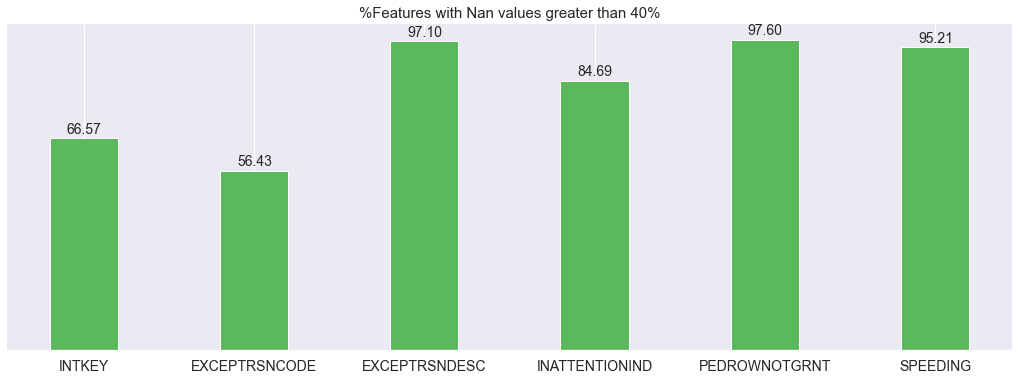

In [434]:
ax = nulls.plot(kind='bar', figsize=(18, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('%Features with Nan values greater than 40%', fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels = nulls.index
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 1.5),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

### Label feature balance

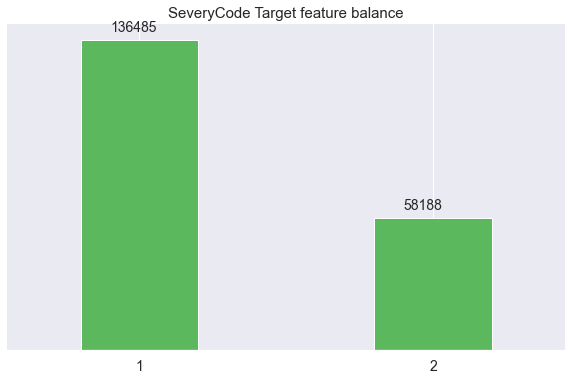

In [435]:
ax = df['SEVERITYCODE'].value_counts().plot(kind='bar', figsize=(10, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('SeveryCode Target feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['SEVERITYCODE'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+3500),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);


#### JUNCTIONTYPE vs ADDRTYPE 

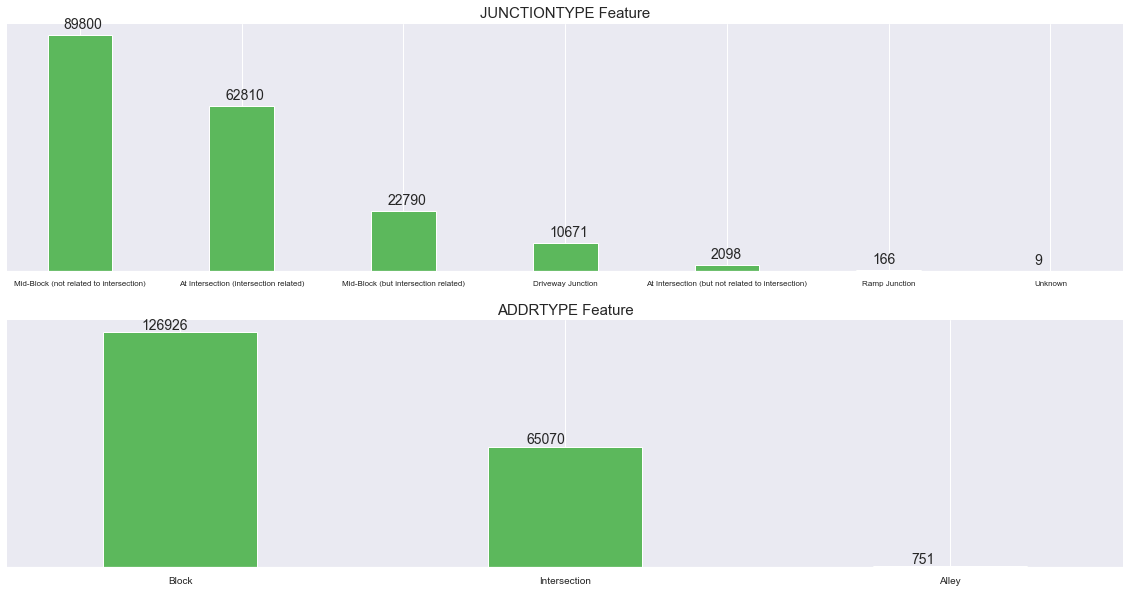

In [436]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['JUNCTIONTYPE'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('JUNCTIONTYPE Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].get_yaxis().set_ticks([])
xticklabels = df['JUNCTIONTYPE'].value_counts().index
for p in ax[0].patches:
    ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 2500),fontsize=14)
ax[0].set_xticklabels(xticklabels, rotation = 0);
#-------
df['ADDRTYPE'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ADDRTYPE Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].get_yaxis().set_ticks([])
xticklabels = df['ADDRTYPE'].value_counts().index
for p in ax[1].patches:
    ax[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height() + 1500),fontsize=14)
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### Collision type feature

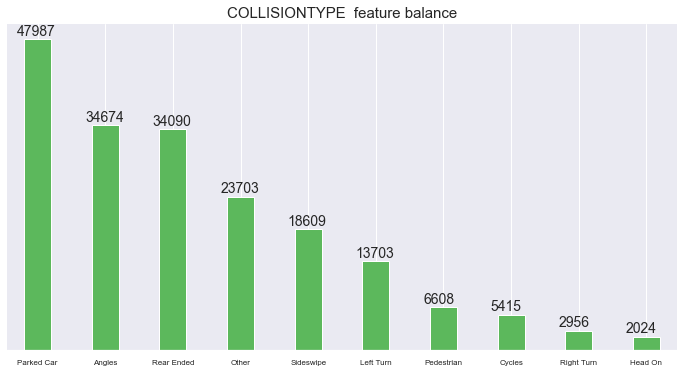

In [437]:
ax = df['COLLISIONTYPE'].value_counts().plot(kind='bar', figsize=(12, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('COLLISIONTYPE  feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['COLLISIONTYPE'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()-0.10, p.get_height()+600),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

#### SDOT_COLCODE vs ST_COLCODE

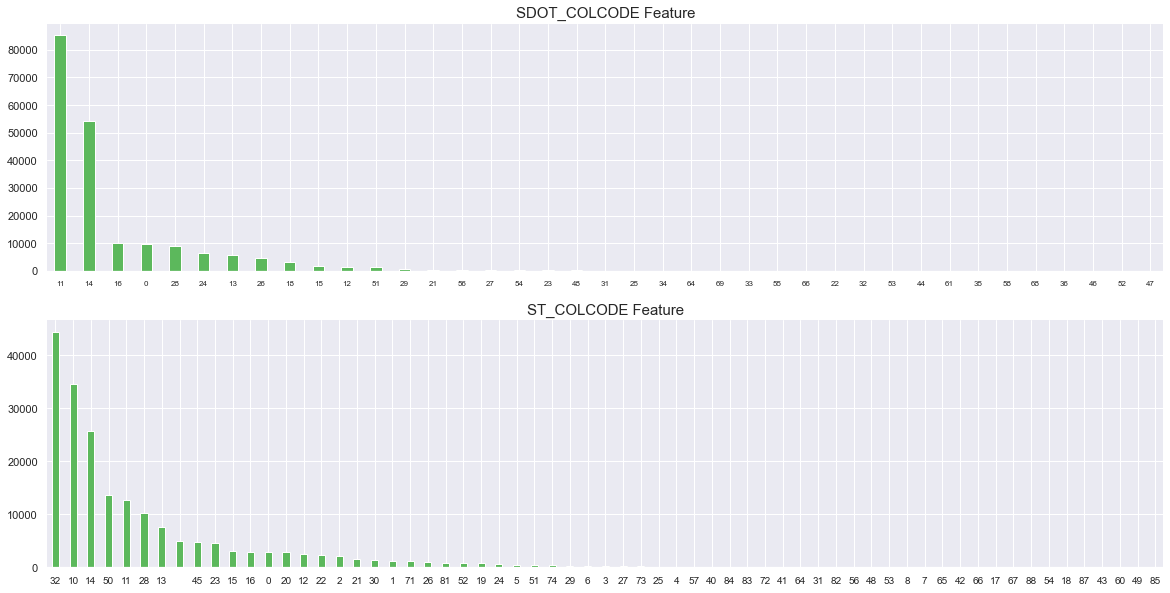

In [438]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['SDOT_COLCODE'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('SDOT_COLCODE Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
xticklabels = df['SDOT_COLCODE'].value_counts().index
ax[0].set_xticklabels(xticklabels, rotation = 0);
#-------
df['ST_COLCODE'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ST_COLCODE Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
xticklabels = df['ST_COLCODE'].value_counts().index
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### ROADCONDITION, WEATHER  FEATURES COMPARISON

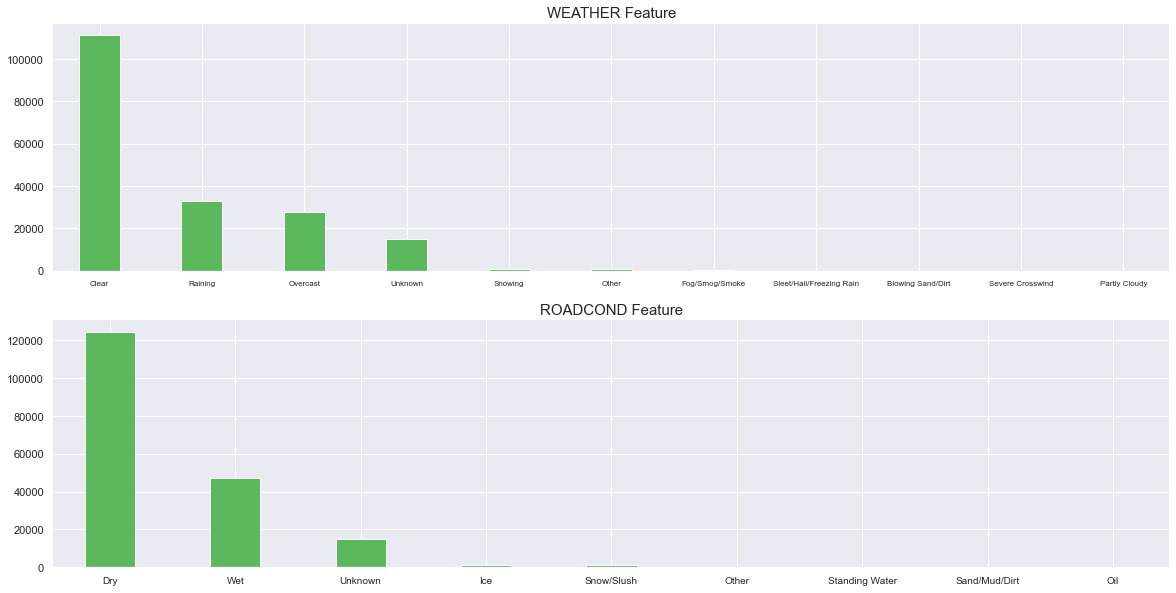

In [439]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10)) 
df['WEATHER'].value_counts().plot(ax=ax[0], kind='bar', width=0.4, color=['#5cb85c'])
ax[0].set_title('WEATHER Feature', fontsize=15)
ax[0].tick_params(axis="x", labelsize=8)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
xticklabels = df['WEATHER'].value_counts().index
ax[0].set_xticklabels(xticklabels, rotation = 0)
#-------
df['ROADCOND'].value_counts().plot(ax=ax[1], kind='bar', width=0.4, color=['#5cb85c'])
ax[1].set_title('ROADCOND Feature', fontsize=15)
ax[1].tick_params(axis="x", labelsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
xticklabels = df['ROADCOND'].value_counts().index
ax[1].set_xticklabels(xticklabels, rotation = 0);

#### PERSONCOUNT and VEHCOUNT

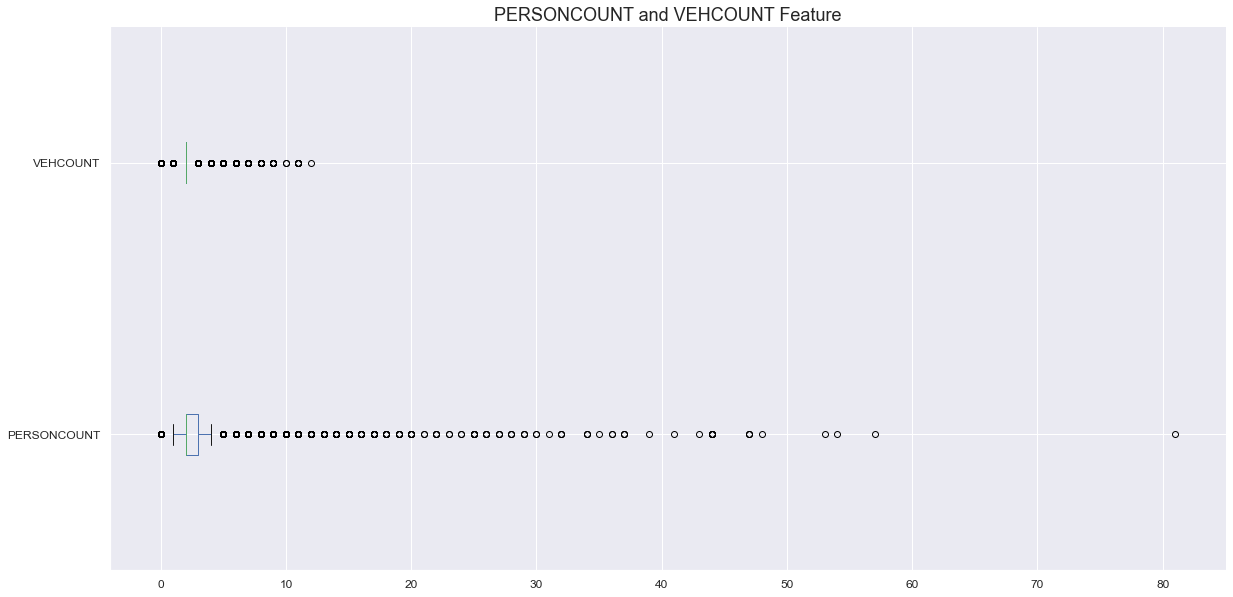

In [440]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10)) 
df[['PERSONCOUNT','VEHCOUNT']].plot(kind='box',ax=ax, vert=False)
ax.set_title('PERSONCOUNT and VEHCOUNT Feature', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
#xticklabels = df['PERSONCOUNT'].value_counts().index
#-------


#### UNDERINFL Feature

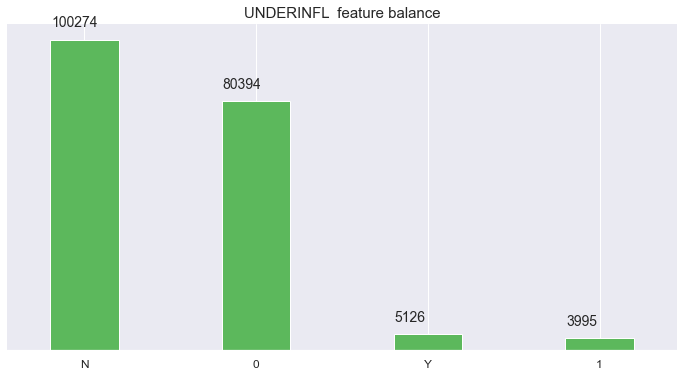

In [441]:
ax = df['UNDERINFL'].value_counts().plot(kind='bar', figsize=(12, 6), width=0.4, color=['#5cb85c'])
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,5)) 
ax.set_title('UNDERINFL  feature balance', fontsize=15)
ax.tick_params(axis="x", labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
xticklabels =df['UNDERINFL'].value_counts().index
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.005, p.get_height()+4000),fontsize=14)
ax.set_xticklabels(xticklabels, rotation = 0);

In [442]:
features = ['SEVERITYCODE','X','Y', 'COLLISIONTYPE', 'VEHCOUNT', 'PERSONCOUNT', 'INCDTTM', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']

In [443]:
df[features].describe(include='all')

,SEVERITYCODE,X,Y,COLLISIONTYPE,VEHCOUNT,PERSONCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE
count,194673.000000,189339.000000,189339.000000,189769,194673.000000,194673.000000,194673,188344,189789,189661,189503,194655
unique,NaN,NaN,NaN,10,NaN,NaN,162058,7,4,9,9,63
top,NaN,NaN,NaN,Parked Car,NaN,NaN,11/2/2006,Mid-Block (not related to intersection),N,Dry,Daylight,32
freq,NaN,NaN,NaN,47987,NaN,NaN,96,89800,100274,124510,116137,44421
mean,1.298901,-122.330518,47.619543,NaN,1.920780,2.444427,NaN,NaN,NaN,NaN,NaN,NaN
std,0.457778,0.029976,0.056157,NaN,0.631047,1.345929,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,-122.419091,47.495573,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,-122.348673,47.575956,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,-122.330224,47.615369,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,-122.311937,47.663664,NaN,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN


# DATA PREPARATION

#### Get the features and target to be used from the general DataSet

In [444]:
churn_df = df[features].copy()
churn_df.head()

,SEVERITYCODE,X,Y,COLLISIONTYPE,VEHCOUNT,PERSONCOUNT,INCDTTM,JUNCTIONTYPE,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE
0,2,-122.323148,47.703140,Angles,2,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Wet,Daylight,10
1,1,-122.347294,47.647172,Sideswipe,2,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Wet,Dark - Street Lights On,11
2,1,-122.334540,47.607871,Parked Car,3,4,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Dry,Daylight,32
3,1,-122.334803,47.604803,Other,3,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Dry,Daylight,23
4,2,-122.306426,47.545739,Angles,2,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Wet,Daylight,10


#### Explore the datatypes for each feature

In [445]:
churn_df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
COLLISIONTYPE     object
VEHCOUNT           int64
PERSONCOUNT        int64
INCDTTM           object
JUNCTIONTYPE      object
UNDERINFL         object
ROADCOND          object
LIGHTCOND         object
ST_COLCODE        object
dtype: object

#### Explore the Nan values

In [446]:
churn_df.isnull().sum()/len(df)*100

SEVERITYCODE     0.000000
X                2.739979
Y                2.739979
COLLISIONTYPE    2.519096
VEHCOUNT         0.000000
PERSONCOUNT      0.000000
INCDTTM          0.000000
JUNCTIONTYPE     3.251093
UNDERINFL        2.508822
ROADCOND         2.574574
LIGHTCOND        2.655736
ST_COLCODE       0.009246
dtype: float64

### Total rows with Nan Values

In [447]:
print('%Nan values in the Dataset: {:.2f}'.format(churn_df.isnull().sum().sum()/len(df)*100))

%Nan values in the Dataset: 19.00


### Drop the Nan values from the Dataset as strategy to clean the null values

In [448]:
churn_df.dropna(inplace=True)

In [449]:
churn_df.shape

(180167, 12)

### Balance the target feature

In [450]:
sev_code = churn_df['SEVERITYCODE'].value_counts().to_frame()
sev_code

,SEVERITYCODE
1,124326
2,55841


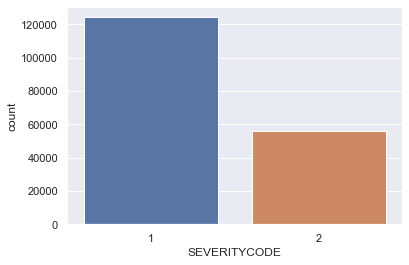

In [451]:
sns.countplot(data=churn_df, x='SEVERITYCODE');

In [452]:
## Split the dataset in two acoording with the target classes
churn_df_1 = churn_df[churn_df['SEVERITYCODE']==1].copy()
churn_df_2 = churn_df[churn_df['SEVERITYCODE']==2].copy()

In [453]:
#Generate an array of random indexes according the size of minor class
random_idx = np.random.permutation(sev_code.min()[0])

# Subsample the biggest dataset as a first strategy to balance de dataset
churn_df1_sub_sample = churn_df_1.iloc[random_idx].copy()
churn_df1_sub_sample.shape

(55841, 12)

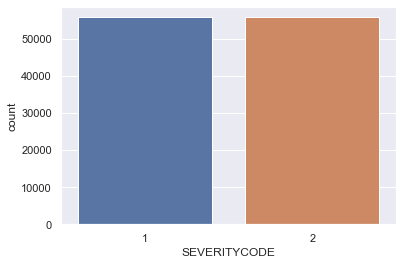

In [454]:
#Put togehter both sub dataframes
churn_dfT = churn_df1_sub_sample.append(churn_df_2)

sns.countplot(data=churn_dfT, x='SEVERITYCODE');

In [455]:
churn_df = churn_dfT.copy()
churn_df.shape

(111682, 12)

### PERSONCOUNT and VEHCOUNT FEATURE Processing

### Remove outliers from the PERSONCOUNT Feature, when the people involved are greater than 10, observations are removed

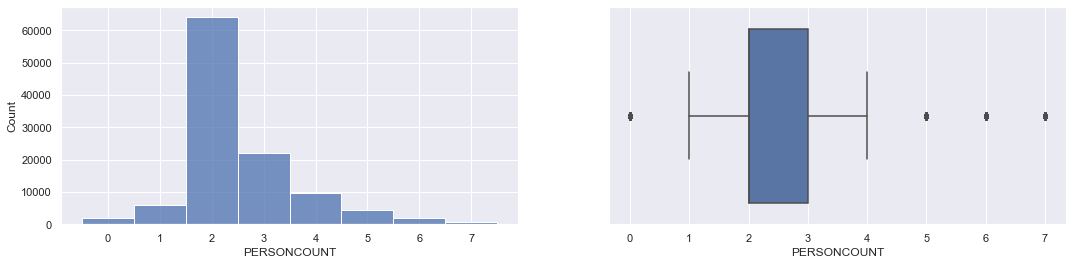

In [456]:
#Calculate range to exclude the outliers
x = churn_df.PERSONCOUNT
upper, lower = np.percentile(x, [1,99])
y = np.clip(x, upper, lower)
indexPersoncnt = churn_df[ churn_df['PERSONCOUNT'] != y].index
churn_df.drop(indexPersoncnt , inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.histplot(data=churn_df,x='PERSONCOUNT',discrete=True,ax=ax[0]) #multiple="stack",ax=ax[0]);
sns.boxplot(data=churn_df,x='PERSONCOUNT',ax=ax[1]);

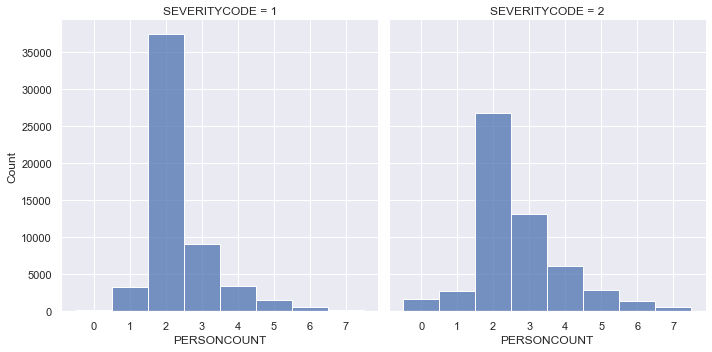

In [457]:
sns.displot(data=churn_df,x='PERSONCOUNT',col='SEVERITYCODE',discrete=True);

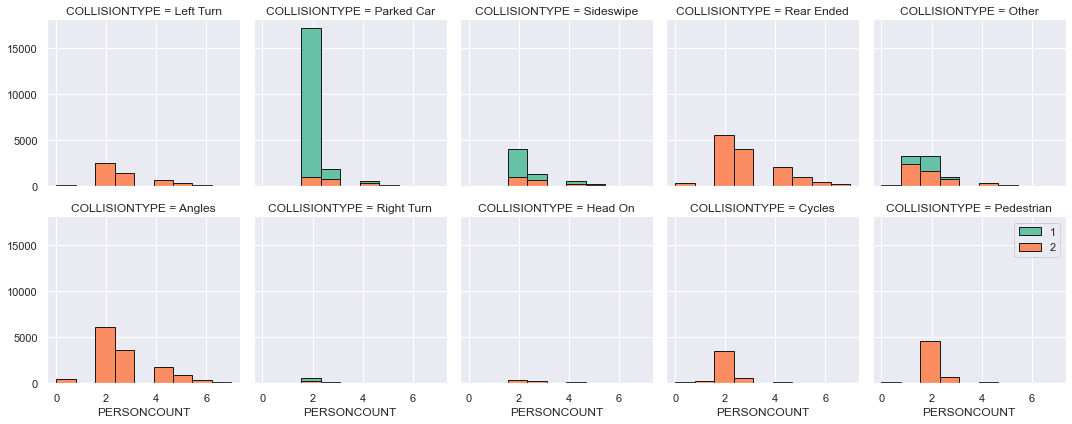

In [458]:
bins = np.linspace(churn_df.PERSONCOUNT.min(), churn_df.PERSONCOUNT.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'PERSONCOUNT', bins=bins, ec="k")

g.axes[-1].legend();

<Figure size 1440x1440 with 0 Axes>

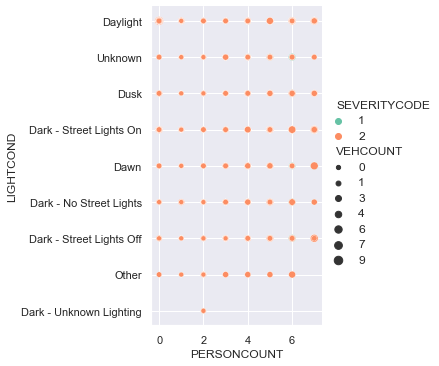

In [459]:
plt.figure(figsize=(20,20))
sns.relplot(x="PERSONCOUNT", y='LIGHTCOND', hue="SEVERITYCODE", size='VEHCOUNT',palette="Set2", data=churn_df);

### VEHCOUNT FEATURE Processing, remove outliers

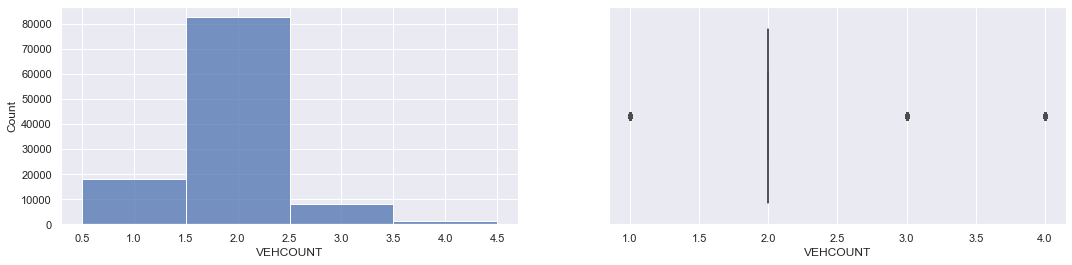

In [460]:
#Calculate range to exclude the outliers
x = churn_df.VEHCOUNT
upper, lower = np.percentile(x, [1,99])
y = np.clip(x, upper, lower)
indexVehcnt = churn_df[ churn_df['VEHCOUNT'] != y].index
churn_df.drop(indexVehcnt , inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.histplot(data=churn_df,x='VEHCOUNT',discrete=True,ax=ax[0]) #multiple="stack",ax=ax[0]);
sns.boxplot(data=churn_df,x='VEHCOUNT',ax=ax[1]);

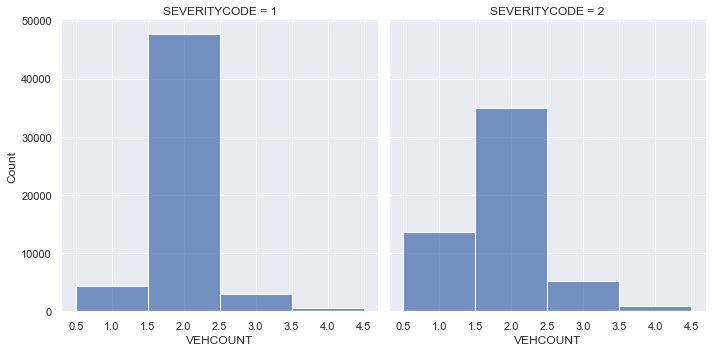

In [461]:
sns.displot(data=churn_df,x='VEHCOUNT',col='SEVERITYCODE',discrete=True);

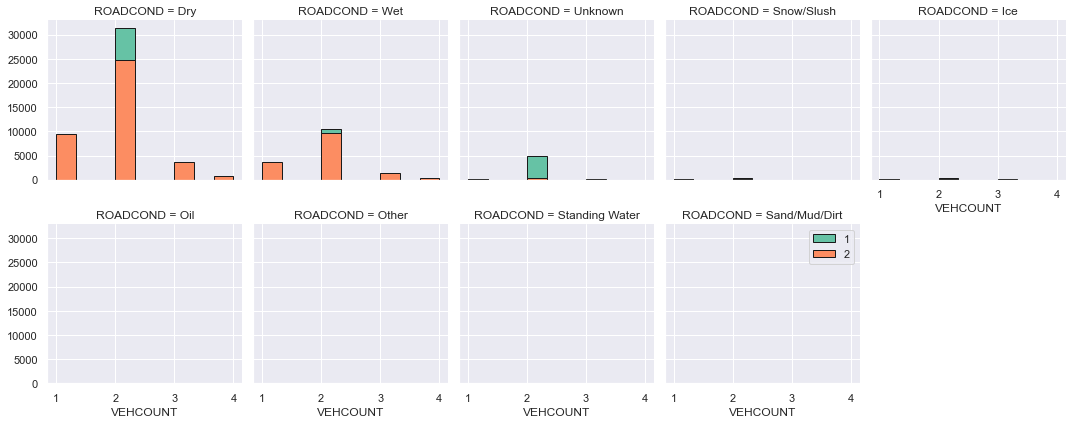

In [462]:
bins = np.linspace(churn_df.VEHCOUNT.min(), churn_df.VEHCOUNT.max(), 10)
g = sns.FacetGrid(churn_df, col="ROADCOND", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'VEHCOUNT', bins=bins, ec="k")

g.axes[-1].legend();

### X and Y Coordinates distribution

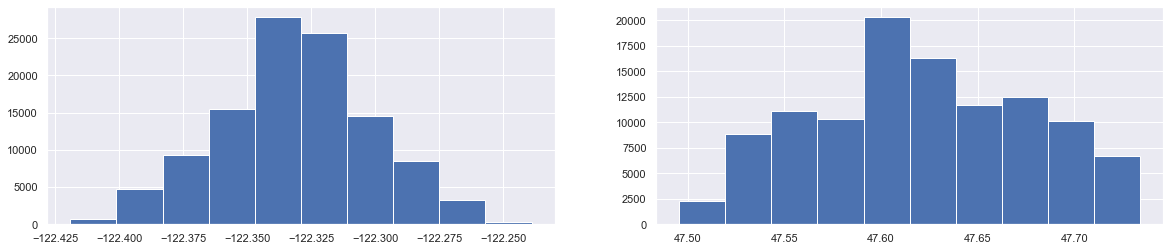

In [463]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#long_rs = churn_df.Y.to_numpy().reshape(-1, 1)
#churn_df.Y = scaler.fit_transform(long_rs)

f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
plt.hist(churn_df['X'])
f.add_subplot(1,2,2)
plt.hist(churn_df['Y']);

In [464]:
#scaler = MinMaxScaler()
#lat_rs = churn_df.X.to_numpy().reshape(-1, 1)
#churn_df.X = scaler.fit_transform(lat_rs)


### Code the collision type

In [465]:
churn_df['COLLISIONTYPE'].value_counts()

Parked Car    22365
Angles        21560
Rear Ended    21542
Other         14016
Sideswipe      8665
Left Turn      8660
Pedestrian     6018
Cycles         4720
Right Turn     1477
Head On        1264
Name: COLLISIONTYPE, dtype: int64

In [466]:
coltype = churn_df[['COLLISIONTYPE']].values
coltype

array([['Left Turn'],
       ['Parked Car'],
       ['Parked Car'],
       ...,
       ['Head On'],
       ['Left Turn'],
       ['Cycles']], dtype=object)

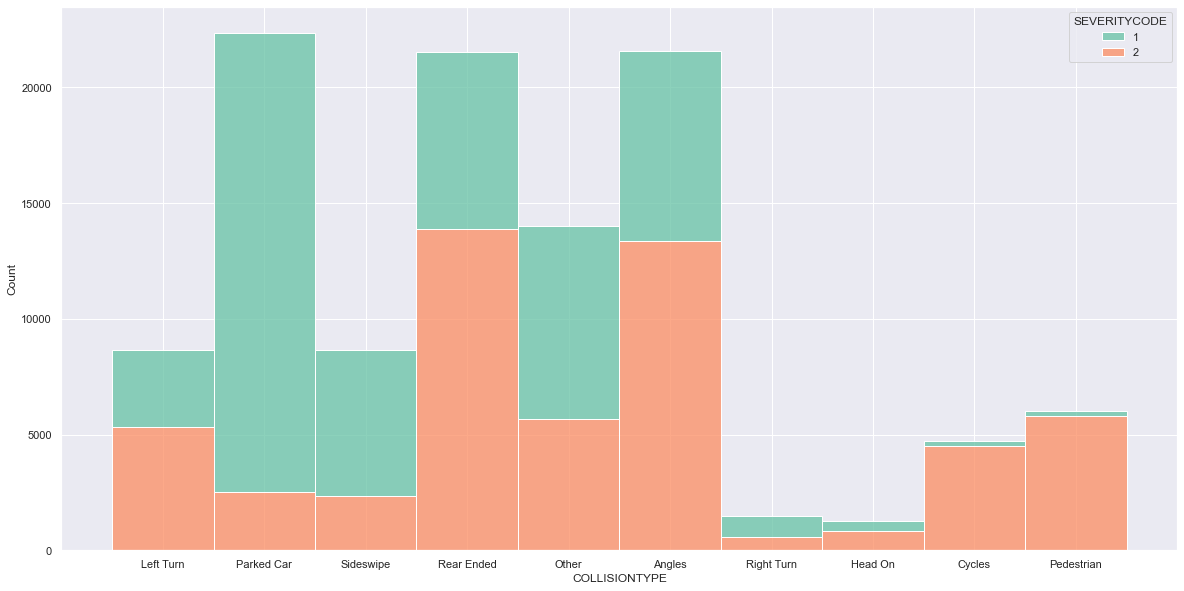

In [467]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(data=churn_df,x='COLLISIONTYPE',hue='SEVERITYCODE',multiple="stack",palette="Set2");

In [468]:
from sklearn import preprocessing
le_coltype = preprocessing.LabelEncoder()
le_coltype.fit(['Parked Car','Angles','Rear Ended', 'Other', 'Sideswipe','Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
churn_df['COLLISIONTYPE']=le_coltype.transform(coltype[:,0])

### Convert the INCDTTM to day of the week

In [469]:
churn_df['DayofWeek'] = pd.to_datetime(churn_df['INCDTTM']).dt.dayofweek
churn_df.drop(columns=['INCDTTM'], inplace=True)

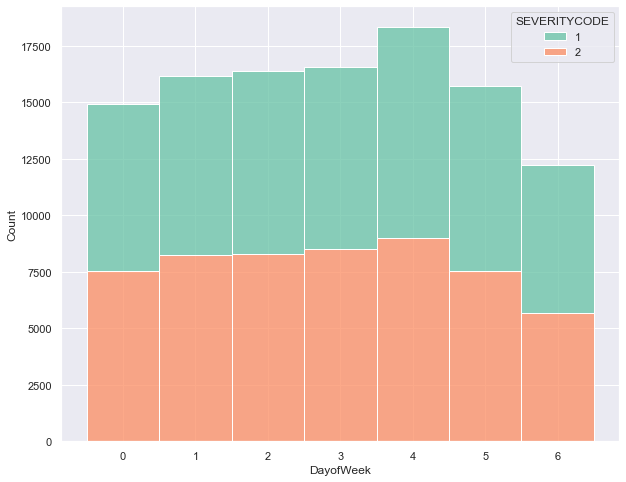

In [470]:
sns.set(rc={'figure.figsize':(10,8)})
sns.histplot(data=churn_df,x='DayofWeek',hue='SEVERITYCODE',multiple="stack",palette="Set2",discrete=True);

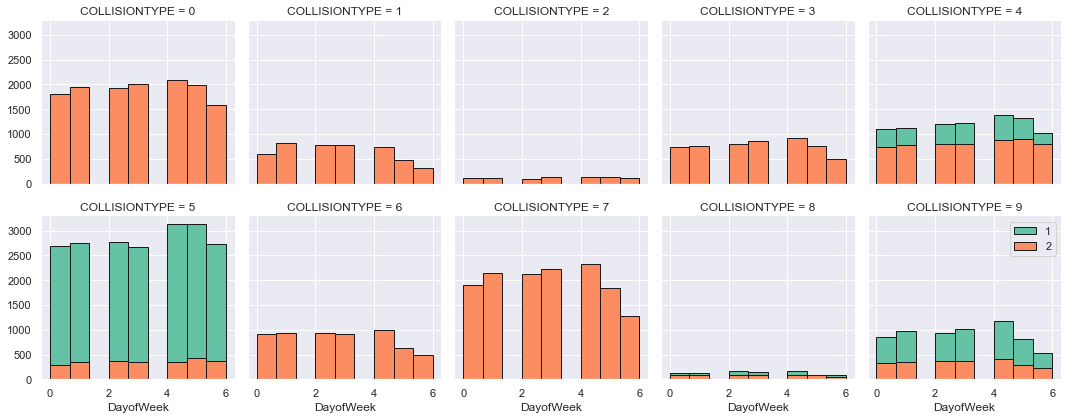

In [471]:
bins = np.linspace(churn_df.DayofWeek.min(), churn_df.DayofWeek.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'DayofWeek', bins=bins, ec="k")

g.axes[-1].legend();

### Code the JUNCTIONTYPE Feature

In [472]:
churn_df.JUNCTIONTYPE.value_counts()

Mid-Block (not related to intersection)              45935
At Intersection (intersection related)               40507
Mid-Block (but intersection related)                 15551
Driveway Junction                                     7293
At Intersection (but not related to intersection)      935
Ramp Junction                                           65
Unknown                                                  1
Name: JUNCTIONTYPE, dtype: int64

In [473]:
juntype = churn_df[['JUNCTIONTYPE']].values
juntype


array([['At Intersection (intersection related)'],
       ['Mid-Block (not related to intersection)'],
       ['Mid-Block (not related to intersection)'],
       ...,
       ['Mid-Block (not related to intersection)'],
       ['At Intersection (intersection related)'],
       ['At Intersection (intersection related)']], dtype=object)

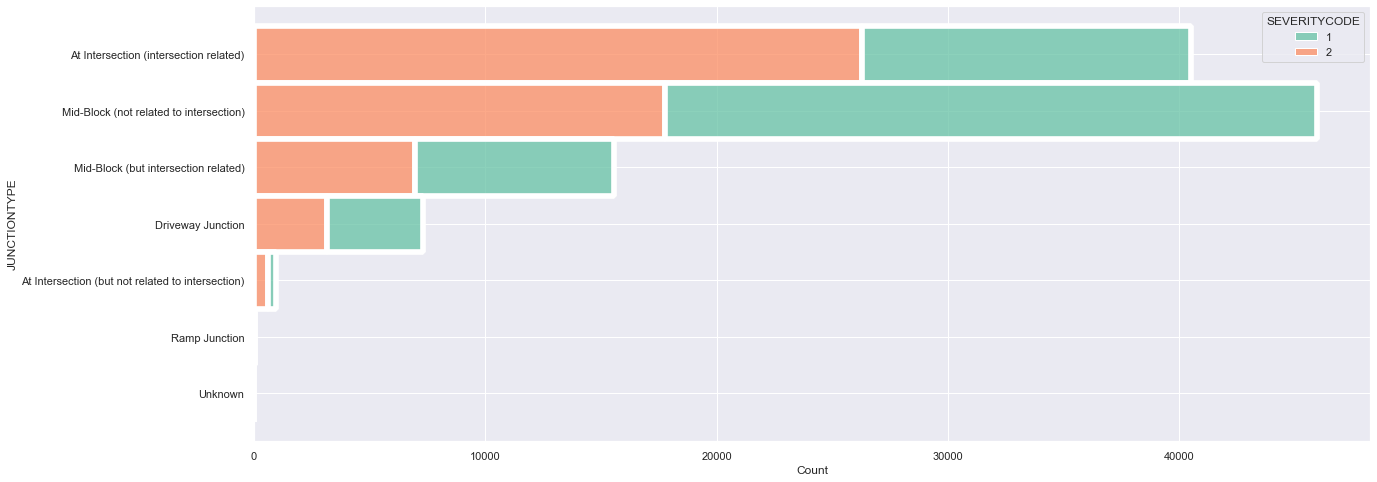

In [474]:
sns.set(rc={'figure.figsize':(20,8)})
sns.histplot(data=churn_df,y='JUNCTIONTYPE',hue='SEVERITYCODE',multiple="stack",palette="Set2");

In [475]:
le_juntype = preprocessing.LabelEncoder()
le_juntype.fit(['At Intersection (but not related to intersection)','Unknown','Ramp Junction','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)', 'At Intersection (intersection related)'])
churn_df['JUNCTIONTYPE']=le_juntype.transform(juntype[:,0]) 


### Code the feature UNDERINFL 

In [476]:
churn_df.UNDERINFL.value_counts()

0    73830
N    30967
1     3612
Y     1878
Name: UNDERINFL, dtype: int64

#### Replace N with 0, Y with 1 and convert to number

In [477]:
churn_df.replace({'UNDERINFL': {'Y': 1, 'N': 0}}, inplace=True)
churn_df['UNDERINFL'] = churn_df['UNDERINFL'].astype('int')

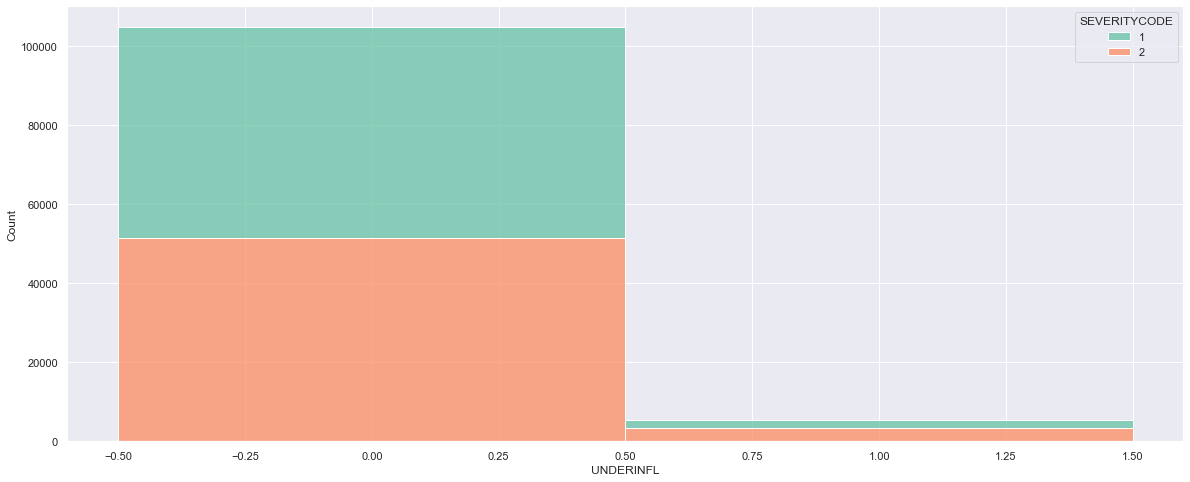

In [478]:
sns.histplot(data=churn_df,x='UNDERINFL',hue='SEVERITYCODE',discrete=True,multiple="stack",palette="Set2");

### Code ROADCOND Feature

In [479]:
churn_df.ROADCOND.value_counts()

Dry               74902
Wet               27887
Unknown            5838
Ice                 835
Snow/Slush          620
Other                74
Standing Water       62
Sand/Mud/Dirt        37
Oil                  32
Name: ROADCOND, dtype: int64

In [480]:
roadtype = churn_df[['ROADCOND']].values
roadtype

array([['Dry'],
       ['Dry'],
       ['Dry'],
       ...,
       ['Dry'],
       ['Dry'],
       ['Dry']], dtype=object)

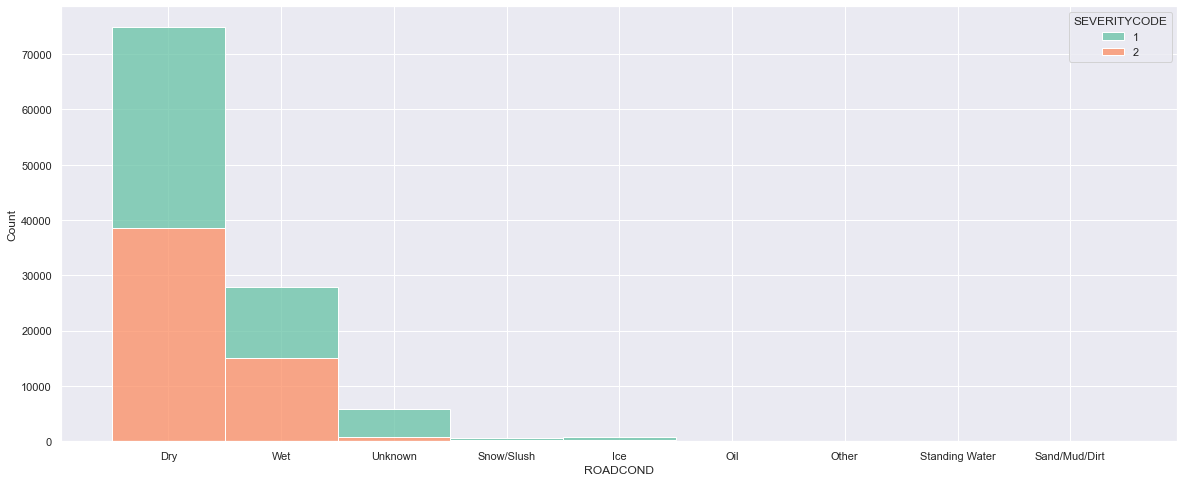

In [481]:
sns.set(rc={'figure.figsize':(20,8)})
sns.histplot(data=churn_df,x='ROADCOND',hue='SEVERITYCODE',multiple="stack",palette="Set2");

In [482]:
le_roadtype = preprocessing.LabelEncoder()
le_roadtype.fit(['Dry','Wet','Unknown','Ice','Snow/Slush', 'Other','Standing Water','Sand/Mud/Dirt','Oil'])
churn_df['ROADCOND']=le_roadtype.transform(roadtype[:,0]) 


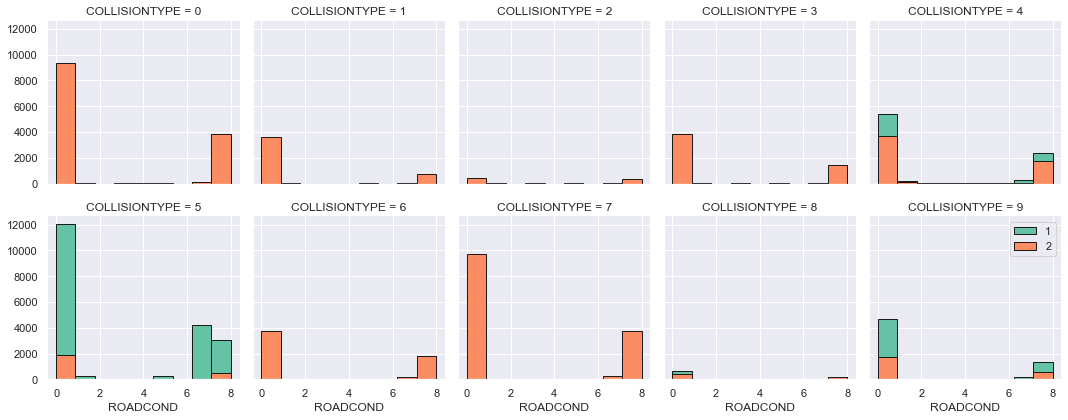

In [483]:
bins = np.linspace(churn_df.ROADCOND.min(), churn_df.ROADCOND.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'ROADCOND', bins=bins, ec="k")

g.axes[-1].legend();

### LIGHTCOND feature processing

In [484]:
churn_df.LIGHTCOND.value_counts()

Daylight                    69890
Dark - Street Lights On     28348
Unknown                      5241
Dusk                         3693
Dawn                         1500
Dark - No Street Lights       820
Dark - Street Lights Off      691
Other                          99
Dark - Unknown Lighting         5
Name: LIGHTCOND, dtype: int64

In [485]:
lighttype = churn_df[['LIGHTCOND']].values
lighttype


array([['Daylight'],
       ['Daylight'],
       ['Daylight'],
       ...,
       ['Daylight'],
       ['Daylight'],
       ['Dusk']], dtype=object)

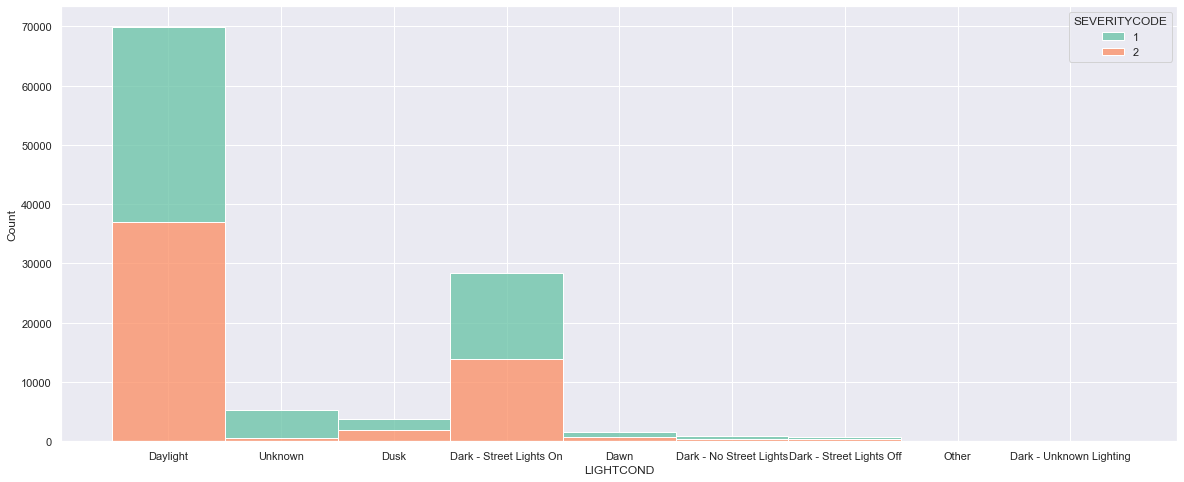

In [486]:
sns.set(rc={'figure.figsize':(20,8)})
sns.histplot(data=churn_df,x='LIGHTCOND',hue='SEVERITYCODE',multiple="stack",palette="Set2");

In [487]:
le_lighttype = preprocessing.LabelEncoder()
le_lighttype.fit(['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'])
churn_df['LIGHTCOND']=le_lighttype.transform(lighttype[:,0]) 


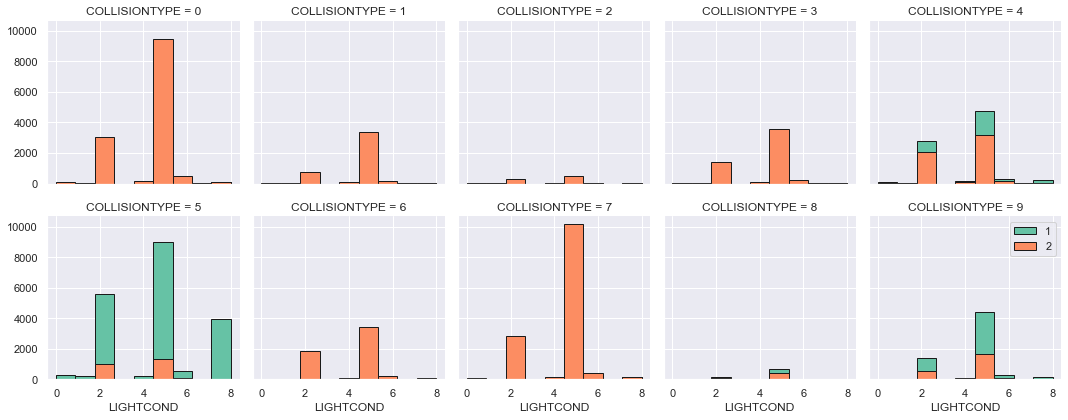

In [488]:
bins = np.linspace(churn_df.LIGHTCOND.min(), churn_df.LIGHTCOND.max(), 10)
g = sns.FacetGrid(churn_df, col="COLLISIONTYPE", hue="SEVERITYCODE", palette="Set2", col_wrap=5)
g.map(plt.hist, 'LIGHTCOND', bins=bins, ec="k")

g.axes[-1].legend();

### ST_COLCODE feature processing

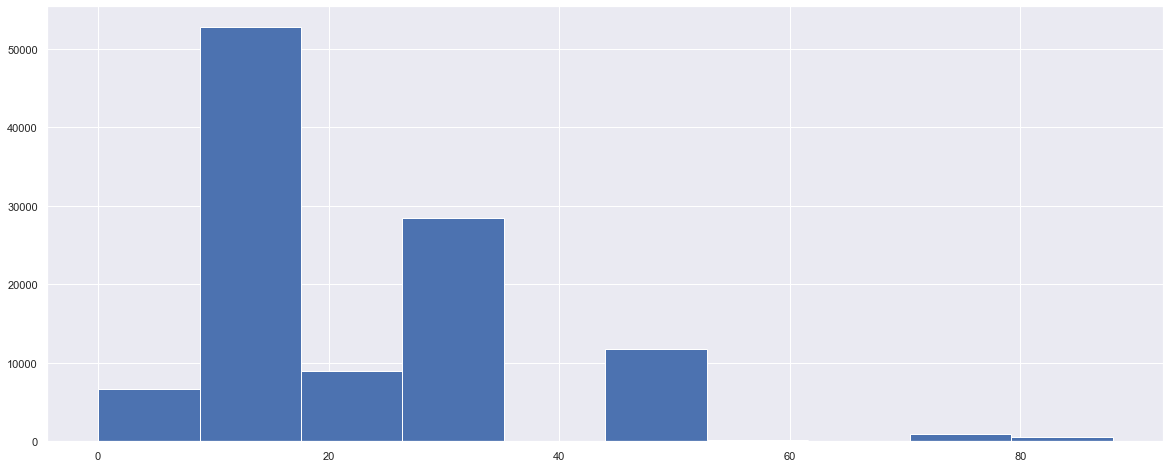

In [490]:
churn_df['ST_COLCODE'] = churn_df['ST_COLCODE'].astype('int')
churn_df.ST_COLCODE.hist();

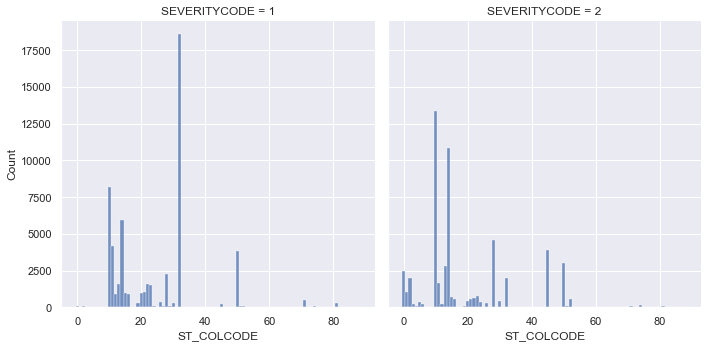

In [491]:
sns.displot(data=churn_df,x='ST_COLCODE',col='SEVERITYCODE',discrete=True);

### Check that all the feature are numerical types to start modelling

In [492]:
churn_df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
COLLISIONTYPE      int64
VEHCOUNT           int64
PERSONCOUNT        int64
JUNCTIONTYPE       int64
UNDERINFL          int64
ROADCOND           int64
LIGHTCOND          int64
ST_COLCODE         int64
DayofWeek          int64
dtype: object

In [55]:
## Use to downsample the datasets to test the models

from sklearn.utils import resample
sample = 1000

churn_df1_downsample = resample(churn_df1_sub_sample,replace = False, n_samples = sample, random_state = 27) 
churn_df2_downsample = resample(churn_df_2,replace = False, n_samples = sample, random_state = 27) 
#churn_dfT = churn_df1_downsample.append(churn_df2_downsample)

### Select and Normalize all the features

In [494]:
features = ['X','Y', 'COLLISIONTYPE', 'VEHCOUNT', 'PERSONCOUNT', 'DayofWeek', 'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE']
X = np.asarray(churn_df[features])
X[0:5]

array([[-122.3177801 ,   47.65836929,    3.        ,    2.        ,
           5.        ,    4.        ,    1.        ,    0.        ,
           0.        ,    5.        ,   15.        ],
       [-122.3281851 ,   47.67401417,    5.        ,    2.        ,
           2.        ,    6.        ,    4.        ,    0.        ,
           0.        ,    5.        ,   32.        ],
       [-122.2887971 ,   47.61162218,    5.        ,    2.        ,
           2.        ,    3.        ,    4.        ,    0.        ,
           0.        ,    5.        ,   32.        ],
       [-122.3278603 ,   47.70136507,    9.        ,    2.        ,
           2.        ,    5.        ,    3.        ,    0.        ,
           0.        ,    5.        ,   11.        ],
       [-122.3113893 ,   47.57250921,    5.        ,    2.        ,
           2.        ,    5.        ,    4.        ,    0.        ,
           0.        ,    8.        ,   32.        ]])

In [502]:
y = churn_df['SEVERITYCODE'].values
y[0:5]


array([1, 1, 1, 1, 1])

### Explore the correlation

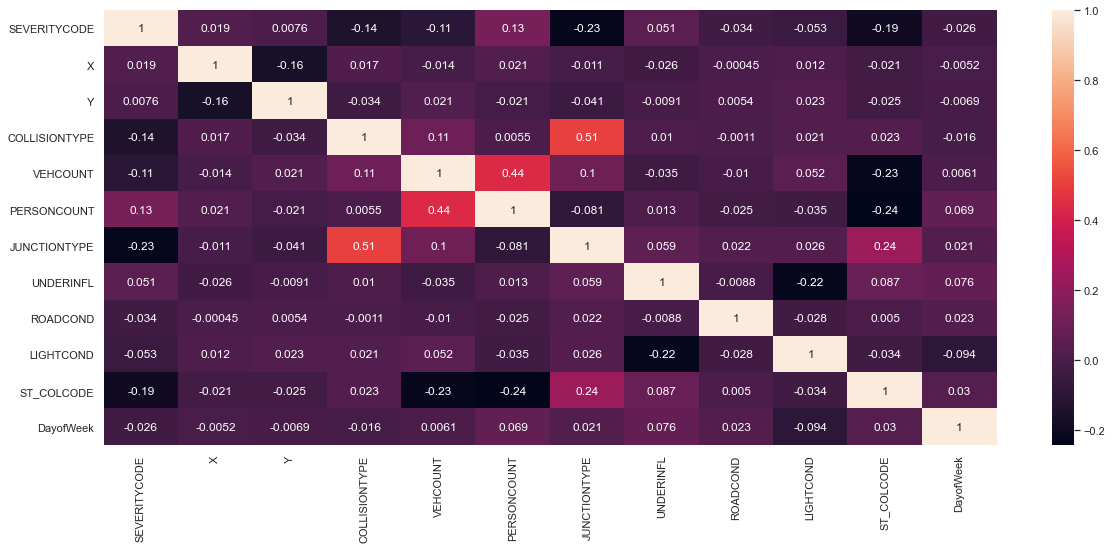

In [558]:
corr =churn_df.corr()
sns.heatmap(corr, annot=True);

### Standarize all the features using MinMaxScaler

In [503]:
from sklearn import preprocessing
#X= preprocessing.StandardScaler().fit(X).transform(X)
X= preprocessing.MinMaxScaler().fit(X).transform(X)
X[0:5]

array([[0.56239616, 0.68238791, 0.33333333, 0.33333333, 0.71428571,
        0.66666667, 0.16666667, 0.        , 0.        , 0.625     ,
        0.17045455],
       [0.50463607, 0.74796602, 0.55555556, 0.33333333, 0.28571429,
        1.        , 0.66666667, 0.        , 0.        , 0.625     ,
        0.36363636],
       [0.72328617, 0.48643967, 0.55555556, 0.33333333, 0.28571429,
        0.5       , 0.66666667, 0.        , 0.        , 0.625     ,
        0.36363636],
       [0.5064391 , 0.86261184, 1.        , 0.33333333, 0.28571429,
        0.83333333, 0.5       , 0.        , 0.        , 0.625     ,
        0.125     ],
       [0.59787267, 0.32249119, 0.55555556, 0.33333333, 0.28571429,
        0.83333333, 0.66666667, 0.        , 0.        , 1.        ,
        0.36363636]])

# MODELING

## Models to be used:

- ### KNN
- ### SVM
- ### Logistic Regression

### Split the dataset in train and  testing datasets

In [504]:
#Train test split to be used for all the models
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (88229, 11) (88229,)
Test set: (22058, 11) (22058,)


### Split the train data in train and evaluation dataset for hyperparameters adjustments

In [505]:
X_train, X_eval, y_train, y_eval, = train_test_split( X_train, y_train, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Eval set:', X_eval.shape,  y_eval.shape)

Train set: (70583, 11) (70583,)
Eval set: (17646, 11) (17646,)


## KNN MODEL

In [506]:
#Import library for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

### Use Gridsearch to find the best hyperparameters for KNN

In [90]:
#Hyperparameters to test
leaf_size = list(range(25,30))
n_neighbors = list(range(20,100))
p=[1]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, algorithm=algorithm)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters,scoring = 'f1',verbose=1)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best Algorithm:', best_model.best_estimator_.get_params()['algorithm'])

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best leaf_size: 25
Best p: 1
Best n_neighbors: 30
Best Algorithm: auto


[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:  6.9min finished


In [509]:
#Testing with the hyperparameters to check the performance

p=1
Ks = 50
leafsize = 25
algorithm = 'auto'

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n, leaf_size=leafsize,p=1, algorithm=algorithm).fit(X_train,y_train)
    yhat=neigh.predict(X_eval)
    mean_acc[n-1] = metrics.accuracy_score(y_eval, yhat)
    std_acc[n-1]=np.std(yhat==y_eval)/np.sqrt(yhat.shape[0])

mean_acc

array([0.6605463 , 0.64382863, 0.68140088, 0.67278703, 0.69205486,
       0.68253429, 0.69641845, 0.68882466, 0.70044203, 0.69154483,
       0.70480562, 0.69794854, 0.70344554, 0.69806188, 0.70644905,
       0.70174544, 0.70718576, 0.70463561, 0.71018928, 0.70582568,
       0.71290944, 0.70967925, 0.71075598, 0.70871586, 0.71126601,
       0.70888587, 0.7133628 , 0.71064264, 0.71245608, 0.71092599,
       0.71364615, 0.71177604, 0.71398617, 0.71200272, 0.71511957,
       0.7127961 , 0.7144962 , 0.71358948, 0.71545959, 0.71438286,
       0.71596962, 0.71630965, 0.71681968, 0.71591295, 0.71687635,
       0.71602629, 0.71817976, 0.71579961, 0.716593  ])

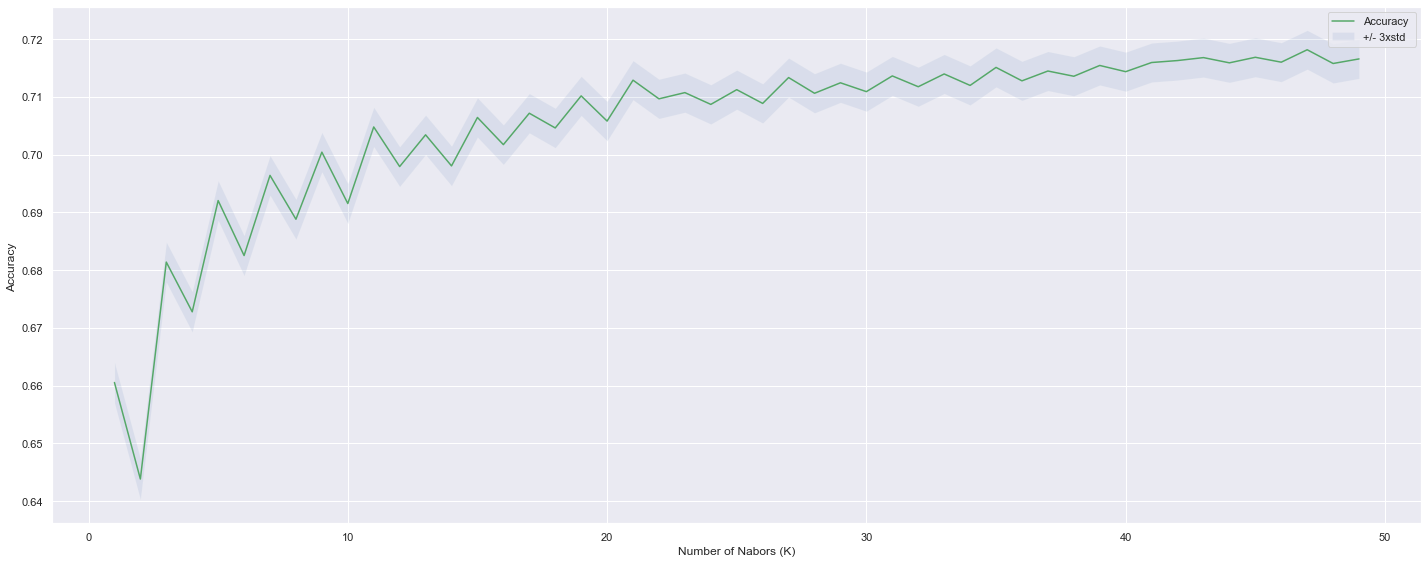

In [510]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.grid(True)
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [511]:
# Best number of neighbores
np.argmax(mean_acc)

46

In [513]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
leafsize = 25
algorithm = 'auto'
k = 46 #The highest accuracy
p = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k, leaf_size=leafsize, algorithm=algorithm, p=p).fit(X_train,y_train)
neigh

#Predicting
yhat = neigh.predict(X_eval)
print('Precision Score : {}'.format(precision_score(y_eval,yhat)))

Precision Score : 0.7206690841034039


### Support Vector Machine

In [514]:
#Import library
from sklearn import svm
from sklearn.model_selection import GridSearchCV

### Find the best hyperparameters for SVM using grid Search

In [84]:
from sklearn.svm import SVC 

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

best_model = grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   46.4s finished


In [85]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
#Predict values based on new parameters
y_hat_acc = best_model.predict(X_eval)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_eval,yhat_acc)))
print('Precision Score : ' + str(precision_score(y_eval,y_hat_acc)))
print('Recall Score : ' + str(recall_score(y_eval,y_hat_acc)))
print('F1 Score : ' + str(f1_score(y_eval,y_hat_acc)))

print('Best Algorithm:', best_model.best_estimator_.get_params())

Accuracy Score : 0.71
Precision Score : 0.7075471698113207
Recall Score : 0.7352941176470589
F1 Score : 0.7211538461538461
Best Algorithm: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


### Model using the best hyperparameters

In [515]:
gamma = 1
kernel = 'rbf'
C = 1
svc_svm = svm.SVC(kernel=kernel, C=C, gamma=gamma)
svc_svm.fit(X_train, y_train)
yhat = svc_svm.predict(X_eval)
print('Precision Score : {}'.format(precision_score(y_eval,yhat)))

Precision Score : 0.758095238095238


### Logistic regression

In [516]:
#Import library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [570]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

clf = LogisticRegression()
grid_values = {'class_weight':['balanced',None],'solver':['liblinear','saga'],'penalty': ['l1','l2'],'C':[0.001,0.005,0.01,0.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
best_model = grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_hat_acc = grid_clf_acc.predict(X_eval)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_eval,y_hat_acc)))
print('Precision Score : ' + str(precision_score(y_eval,y_hat_acc)))
print('Recall Score : ' + str(recall_score(y_eval,y_hat_acc)))
print('F1 Score : ' + str(f1_score(y_eval,y_hat_acc)))

print('Best Algorithm:', best_model.best_estimator_.get_params())

Accuracy Score : 0.6478522044656013
Precision Score : 0.6367312194083847
Recall Score : 0.6812386156648452
F1 Score : 0.6582334176658234
Best Algorithm: {'C': 0.005, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Model using the best hyperparameters for Linear Regression

In [571]:
C = 0.005
solver = 'liblinear'
penalty = 'l1'
class_weight = 'balanced'
LR = LogisticRegression(C=C, solver=solver, penalty= penalty, class_weight=class_weight).fit(X_train,y_train)
LR 

LogisticRegression(C=0.005, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [574]:
#Predict
yhat = LR.predict(X_eval)
print('Precision Score : {}'.format(precision_score(y_eval,y_hat_acc)))

Precision Score : 0.6367312194083847


In [575]:
#Prediction probability
yhat_prob = LR.predict_proba(X_eval)
yhat_prob[:5]

array([[0.6 , 0.4 ],
       [0.65, 0.35],
       [0.85, 0.15],
       [0.73, 0.27],
       [0.43, 0.57]])

# EVALUATION

## Using the test set, different metrics will be used to evaluate the diffents modells:

- F1 Score
- Jaccard Index
- Accuracy
- Log loss

## Evaluate the predictions using each trainned model with the test set

In [521]:
#Predicting using KNN using K=11 best result
yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]

array([1, 1, 1, 2, 2])

In [522]:
# Predicting using SVM model
yhat_svm = svc_svm.predict(X_test)
yhat_svm[0:5]

array([1, 1, 1, 2, 2])

In [576]:
# Predicting using Logistic Regression
yhat_lr = LR.predict(X_test)
yhat_lr[:5]

#Prediction probability
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]


array([[0.65, 0.35],
       [0.66, 0.34],
       [0.51, 0.49],
       [0.59, 0.41],
       [0.29, 0.71]])

In [577]:
#Import metrics from sklearn

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef


## Calcule the different index using the yhat predicted by each model

In [578]:
knn_f1 = f1_score(y_test, yhat_knn, average='weighted')
knn_pc = precision_score(y_test, yhat_knn)
knn_acc = metrics.accuracy_score(y_test, yhat_knn)
knn_rc = metrics.recall_score(y_test, yhat_knn)
knn_mcc = matthews_corrcoef(y_test, yhat_knn) 

svm_f1 = f1_score(y_test, yhat_svm, average='weighted')
svm_pc = precision_score(y_test, yhat_svm)
svm_acc = metrics.accuracy_score(y_test, yhat_svm)
svm_rc = recall_score(y_test, yhat_svm)
svm_mcc = matthews_corrcoef(y_test, yhat_svm)

lr_f1 = f1_score(y_test, yhat_lr, average='weighted', labels=np.unique(yhat_lr))
lr_pc = precision_score(y_test, yhat_lr)
lr_acc = metrics.accuracy_score(y_test, yhat_lr)
lr_rc = recall_score(y_test, yhat_lr)
lr_mcc = matthews_corrcoef(y_test, yhat_lr)
lr_loss =log_loss(y_test, yhat_prob)

### Function to graph confusion matrix from course materials 

In [579]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def ax_plot_confusion_matrix(cm, classes,ax,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.sca(ax)
    ax.grid(False)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


## Create a report with different index together

In [580]:
report_df = pd.DataFrame({'Algorithm':['KNN','SVM', 'LogisticRegression'],'MCC':[knn_mcc, svm_mcc, lr_mcc],'RECALL':[knn_rc, svm_rc, lr_rc], 'Precision':[knn_pc, svm_pc, lr_pc], 'F1-score':[knn_f1, svm_f1, lr_f1], 'Accuracy':[knn_acc, svm_acc, lr_acc], 'LogLoss':['NA', 'NA', lr_loss]} )


In [581]:
from IPython.display import display, HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))
HTML(report_df.to_html(index=False))

Algorithm,MCC,RECALL,Precision,F1-score,Accuracy,LogLoss
KNN,0.434911,0.705136,0.723218,0.717340,0.717381,NA
SVM,0.447111,0.642449,0.762171,0.719020,0.720736,NA
LogisticRegression,0.297292,0.684211,0.638732,0.647832,0.648291,0.633055


## Classification report for each model

In [582]:
print (classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           1       0.72      0.71      0.71     11039
           2       0.71      0.73      0.72     11019

    accuracy                           0.72     22058
   macro avg       0.72      0.72      0.72     22058
weighted avg       0.72      0.72      0.72     22058



In [583]:
print (classification_report(y_test, yhat_svm))

              precision    recall  f1-score   support

           1       0.76      0.64      0.70     11039
           2       0.69      0.80      0.74     11019

    accuracy                           0.72     22058
   macro avg       0.73      0.72      0.72     22058
weighted avg       0.73      0.72      0.72     22058



In [584]:
print (classification_report(y_test, yhat_lr))

              precision    recall  f1-score   support

           1       0.64      0.68      0.66     11039
           2       0.66      0.61      0.63     11019

    accuracy                           0.65     22058
   macro avg       0.65      0.65      0.65     22058
weighted avg       0.65      0.65      0.65     22058



### Confusion matrix for each model

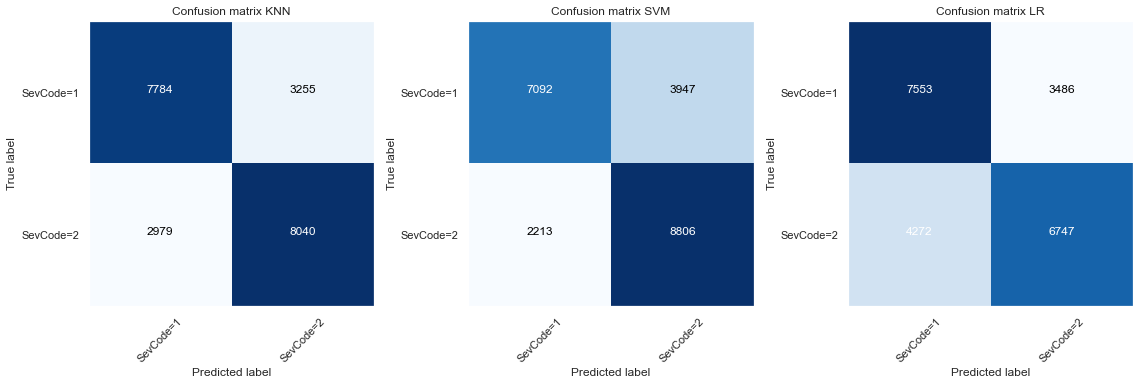

In [585]:
# Compute confusion matrix
cnf_matrix_knn = confusion_matrix(y_test, yhat_knn, labels=[1,2])
cnf_matrix_svm = confusion_matrix(y_test, yhat_svm, labels=[1,2])
cnf_matrix_lr = confusion_matrix(y_test, yhat_lr, labels=[1,2])
np.set_printoptions(precision=2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8))  
# Plot non-normalized confusion matrix

ax_plot_confusion_matrix(cnf_matrix_knn, classes=['SevCode=1','SevCode=2'],ax=ax[0], normalize= False,  title='Confusion matrix KNN')
ax_plot_confusion_matrix(cnf_matrix_svm, classes=['SevCode=1','SevCode=2'],ax=ax[1], normalize= False,  title='Confusion matrix SVM')
ax_plot_confusion_matrix(cnf_matrix_lr, classes=['SevCode=1','SevCode=2'],ax=ax[2], normalize= False,  title='Confusion matrix LR')

# DEPLOYMENT

In [591]:
from mlxtend.plotting import plot_decision_regions
churn_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'COLLISIONTYPE', 'VEHCOUNT', 'PERSONCOUNT',
       'JUNCTIONTYPE', 'UNDERINFL', 'ROADCOND', 'LIGHTCOND', 'ST_COLCODE',
       'DayofWeek'],
      dtype='object')

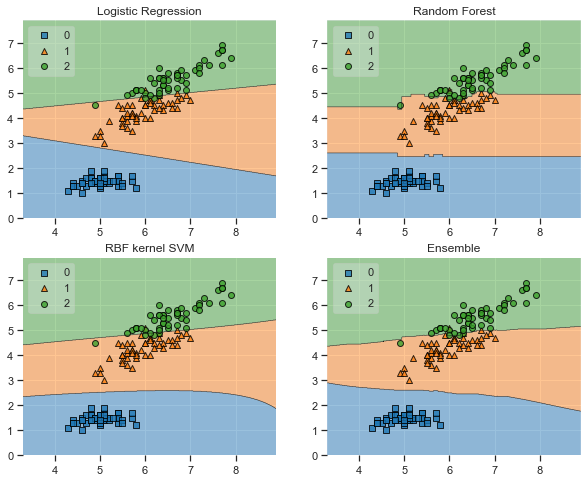

In [607]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
X, y = iris_data()
X = X[:,[0, 2]]

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()